In [4]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 1장 들어가기

데이터 과학은 수 많은 데이터 속에서 필요한 답을 찾는 방법을 연구하는 과학이며,
데이터 과학자는 난잡한 데이터로부터 필요한 정보를 이끄러 내는 사람을 가리킨다.

## 핵심 인물 찾기

아래 코드에서 `id`와 `name`이 연결되어 있음을 직관적으로 알 수 있다.

In [5]:
users = [
    { "id": 0, "name": "Hero" },
    { "id": 1, "name": "Dunn" },
    { "id": 2, "name": "Sue" },
    { "id": 3, "name": "Chi" },
    { "id": 4, "name": "Thor" },
    { "id": 5, "name": "Clive" },
    { "id": 6, "name": "Hicks" },
    { "id": 7, "name": "Devin" },
    { "id": 8, "name": "Kate" },
    { "id": 9, "name": "Klein" }
]

친구관계가 아이디(id)로 구성된 튜플을 이용하여 제시된다.

In [6]:
friendship_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
                    (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

친구관계를 네트워크 그림으로 나타내면 다음과 같다.

In [19]:
friendship_graph = nx.Graph()
friendship_graph.add_edges_from(friendship_pairs)

# 임의의 포지션 지정
# pos = nx.spring_layout(friendship_graph)

아래 포지션이 멋진 네트워크 이미지 생성해줌.

**주의:** 임의의 포시션을 사용하려면 아래 명령문 주석처리 할 것.

In [20]:
pos = {0: np.array([-0.93170375, -0.02197117]),
        1: np.array([-0.72438717, -0.08068836]),
        2: np.array([-0.73451474,  0.06758806]),
        3: np.array([-0.47435  ,  0.0068244]),
        4: np.array([-0.11830089,  0.01805556]),
        5: np.array([0.2389443 , 0.02015169]),
        6: np.array([ 0.4986366 , -0.08446365]),
        7: np.array([0.50763805, 0.11006795]),
        8: np.array([ 0.7380376 , -0.00350229]),
        9: np.array([ 1.        , -0.03206219])}

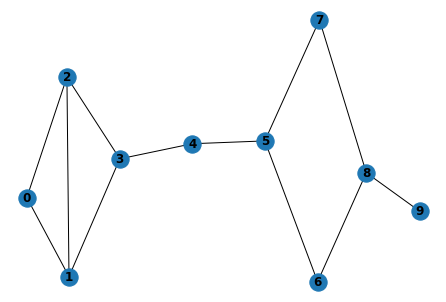

In [21]:
nx.draw(friendship_graph, pos, with_labels=True, font_weight='bold')

#### 알아두기
* 모델링: 친구 관계를 네트워크 모델로 표현하였다.
* 모둠 자료형(collection data types): `list`, `tuple`, `dict` 유사점과 차이점

`friendship_pairs`에 사용된 리스트 자료형은 검색 기능이 매우 비효율적이다.
반면에 `dict` 자료형은 보다 빠른 검색 기능을 제공한다.
`dict` 자료형을 이용하여 아래처럼 친구관계를 나타낼 수 있다.
```
{ 0 : 0번의 친구들 리스트,
  1 : 1번의 친구들 리스트,
  ...
  9 : 9번의 친구들 리스트 }
```

In [29]:
friendships = {user["id"]: [] for user in users}

for i, j in friendship_pairs:
    friendships[i].append(j)
    friendships[j].append(i)

#### 알아두기: 조건제시법

* 튜플, 리스트, 딕셔너리 조건제시법
* 집합 조건제시법과 유사

결과는 다음과 같다.

In [30]:
friendships

{0: [1, 2],
 1: [0, 2, 3],
 2: [0, 1, 3],
 3: [1, 2, 4],
 4: [3, 5],
 5: [4, 6, 7],
 6: [5, 8],
 7: [5, 8],
 8: [6, 7, 9],
 9: [8]}

특정 사용자의 친구 수는 다음 함수를 이용하여 구할 수 있다.

In [31]:
def number_of_friends(user):
    """ user의 친구는 몇 명?
        입력값 예제: { "id": 0, "name": "Hero" } """
    user_id = user["id"]
    friend_ids = friendships[user_id]
    return len(friend_ids)

#### 알아두기
* 함수
* 파이썬에서 함수 정의하는 법
* `lambda` 함수

위 네트워크 그림에서 알 수 있듯이 0번 아이디의 친구는 2명임을 확인할 수 있음.

In [32]:
number_of_friends({ "id": 0, "name": "Hero" })

2

사용자들의 친구 수를 모두 합한 결과는 다음과 같다.

In [33]:
total_connections = sum(number_of_friends(user) for user in users)
total_connections

24

사용자들의 평균 친구 수는 다음과 같다.

In [34]:
num_users = len(users)
avg_connections = total_connections / num_users
avg_connections

2.4

가장 많은 사람과 친구 관계를 맺은 사용자는 가장 많은 친구 수를 갖는 사용자이다. 
리스트의 정렬 기법을 활용한다. 

In [35]:
num_friends_by_id = [(user["id"], number_of_friends(user))
                     for user in users]

num_friends_by_id.sort(                             
       key=lambda id_and_friends: id_and_friends[1],
       reverse=True)                                
num_friends_by_id

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

#### 알아두기
* 리스트 정렬 옵션: 키(`key`), 리버스(`reverse`)
* 리스트의 길이가 매우 큰 경우 정렬이 아닌 다른 방법을 활용하는 것이 좋다. 
    정렬은 (시간적/공간적) 비용이 많이 들기 때문이다. 
    즉, 시간도 많이 들고 메모리도 많이 사용한다.

### 연결 중심성(degree centrality)

연결 중심성은 네트워크 모델에서 사용되는 거리 개념의 일종이며,
네트워크 모델의 중심인물 찾기에 활용된다.
연결 중심성을 기준으로 친구 관계를 표현하면 다음과 같다.

In [36]:
degreeCentrality = nx.degree_centrality(friendship_graph)

In [38]:
degreeCentrality

{0: 0.2222222222222222,
 1: 0.3333333333333333,
 2: 0.3333333333333333,
 3: 0.3333333333333333,
 4: 0.2222222222222222,
 5: 0.3333333333333333,
 6: 0.2222222222222222,
 7: 0.2222222222222222,
 8: 0.3333333333333333,
 9: 0.1111111111111111}

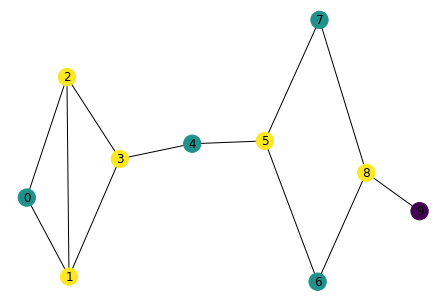

In [37]:
nx.draw(friendship_graph, pos, with_labels=True,
        node_color=list(degreeCentrality.values()),
        nodelist=list(degreeCentrality.keys()))

위 그림은 4번 id를 가진 Thor가 네트워크의 중심이라는 인상을 준다. 
하지만 Thor는 두 명의 친구가 있지만 보다 많은 친구를 가진 다른 사용자가 존재한다.
22장에서 중심성의 다양한 개념을 살펴볼 것이다.

#### 알아두기
* 네트워크 모델 중심인물 찾기 기준은 다양할 수 있다.
    * 팔로워 수, 트윗 수, 게시글 수, 등등
    * 여기서는 연결 중심성을 기준으로 활용하였다.
* 모델링
    * 친구 관계를 네트워크 모델로 표현하였다.
    * 또한 연결 중심성을 색상을 이용하여 표현하였다.
        (**주의:** 책에서는 원의 크기를 이용)
    * 연결 중심성 이외에 다른 중심성 개념이 존재하며, 
        중심성 개념이 달라지면 모델도 달라진다. (22장 참조)
        * 매개 중심성(betweenness centrality)
        * 고유벡터 중심성(eigenvector centrality)

## 친구 추천

친구 추천 기능을 어떻게 구현할 것인가, 
즉 친구 추천을 위해 어떤 모델을 사용할 것인가를 고민한다.
예를 들어, 친구의 친구들의 목록을 다음과 같이 확인할 수 있다.

**주의** 
* 함수 이름에 `bad` 단어가 포함되어 있으면 추천하는 방법이 아니라는 의미이다.
    이유는 곧 알게 될 것이다.

In [16]:
def foaf_ids_bad(user):
    return [foaf_id
            for friend_id in friendships[user["id"]]
            for foaf_id in friendships[friend_id]]

0번 아이디를 가진 Hero의 친구의 친구 리스트는 다음과 같다.

In [17]:
foaf_ids_bad(users[0])

[0, 2, 3, 0, 1, 3]

함수 이름에 `bad` 단어 사용 이유는
첫째, 0번 아이디 스스로 자신의 친구의 친구가 되고, 
둘째, 3번 아이디의 경우처럼 두 친구의 친구가 되어 두 번 언급되기 때문이다.

### 친구 공유

반면에 서로 아는 친구관계를 알아보는 일도 흥미로운 주제이다.
다만 여기서도 앞서 언급한 문제를 피해야 하며
진정으로 친구의 친구만 선택해야 한다.

In [18]:
from collections import Counter                  

def friends_of_friends(user):
    user_id = user["id"]
    return Counter(
        foaf_id
        for friend_id in friendships[user_id]    
        for foaf_id in friendships[friend_id]    
        if foaf_id != user_id                           # user 자신 제외
            and foaf_id not in friendships[user_id]     # user의 (직접) 친구 제외
    )

예를 들어, 3번 아이디인 Chi(카이)의 친구들인 1, 2, 4번 아이디는 
Chi와 Chi의 친구관계에 있는 자신들을 제외하고 0번 아이디 또는 5번 아이디를 친구로 둔다. 
즉, 0번 아이디와 5번 아이디 순수한 3번 아이디의 친구의 친구 관계를 맺는다.
이를 달리 해석하면 
0번 아이디와 3번 아이디는 서로 친구는 아니지만 한 명 이상의 친구를 공유한다.

친구관계 네트워크 모델에서 확인할 수 있듯이 
0번 아이디와 (3번 아이디인) Chi는 2명의 친구를 공유하고, 
5번 아이디와 Chi는 1명의 친구를 공유함을 알 수 있다.
실제로 아래 실행결과가 동일한 결과를 보여준다.

In [19]:
friends_of_friends(users[3])

Counter({0: 2, 5: 1})

#### 알아두기
* `Counter` 자료형

### 공통 관심사

사용자들의 관심사를 모아둔 데이터가 다음과 같다.

In [20]:
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

예를 들어, 0번 아이디와 9번 아이디는 친구 관계는 아니지만 둘 모두 Java와 Big Data에 관심이 있다.

특정 분야에 관심을 갖는 사용자 찾기는 꽤 쉽다.

In [21]:
def data_scientists_who_like(target_interest):
    """특정분야(target interest)에 관심을 가진 아이디 찾기"""
    return [user_id
            for user_id, user_interest in interests
            if user_interest == target_interest]

예를 들어, Big Data에 관심 있는 사용자들은 0번, 8번, 9번 아이디이다.

In [22]:
data_scientists_who_like('Big Data')

[0, 8, 9]

#### 리스트(`list`) 대신에 사전(`dict`) 자료형 활용해야 하는 경우

`data_scientists_who_like` 함수를 여러 번 호출하거나 
사용자 데이터가 매우 클 경우, 위 작업은 매우 비효율적이 된다.
아래와 같이 사용자들의 관심사를 한 번만 훑은 다음에 관련 정보를 
`dict` 자료형으로 저장해 두는 것이 좋다.

In [23]:
from collections import defaultdict

user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)

이제 `user_ids_by_interest`에는 
`관심사:[관심 있는 아이디 리스트]` 형식으로 구성된 사전(`dict`) 
자료형이 생성된다.

예를 들어, `Big Data`에 관심을 가진 사용자들의 리스트는 다음과 같다.

In [24]:
user_ids_by_interest['Big Data']

[0, 8, 9]

실제 `user_ids_by_interest`에 저장된 값은 다음과 같다.

In [25]:
user_ids_by_interest

defaultdict(list,
            {'Hadoop': [0, 9],
             'Big Data': [0, 8, 9],
             'HBase': [0, 1],
             'Java': [0, 5, 9],
             'Spark': [0],
             'Storm': [0],
             'Cassandra': [0, 1],
             'NoSQL': [1],
             'MongoDB': [1],
             'Postgres': [1],
             'Python': [2, 3, 5],
             'scikit-learn': [2, 7],
             'scipy': [2],
             'numpy': [2],
             'statsmodels': [2],
             'pandas': [2],
             'R': [3, 5],
             'statistics': [3, 6],
             'regression': [3, 4],
             'probability': [3, 6],
             'machine learning': [4, 7],
             'decision trees': [4],
             'libsvm': [4],
             'C++': [5],
             'Haskell': [5],
             'programming languages': [5],
             'mathematics': [6],
             'theory': [6],
             'Mahout': [7],
             'neural networks': [7, 8],
             'deep learning': 

사전 자료형 값에 사용될 키(key)는 활용성을 생각하고 지정해야 한다.
예를 들어, 사용자 아이디를 키로 활용하려면 다음과 같이 정의한다.

In [26]:
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

예를 들어, 3번 아이디의 관심사는 다음과 같다.

In [27]:
interests_by_user_id[3]

['R', 'Python', 'statistics', 'regression', 'probability']

#### 알아두기
* `defaultdict` 개념과 활용
    * [여기](https://docs.python.org/3/library/collections.html#collections.defaultdict) 설명 참조
* 리스트 `append` 메소드

사용자와 관심사를 공유하는 다른 사용자들을 찾아보자.

In [28]:
def most_common_interests_with(user):
    return Counter(
        interested_user_id
        for interest in interests_by_user_id[user["id"]]
        for interested_user_id in user_ids_by_interest[interest]
        if interested_user_id != user["id"]
    )

예를 들어 3번 아이디의 사용자와 공통 관심사를 갖는 사용자들과 공통 관심사의 개수는 다음과 같다.

In [29]:
most_common_interests_with(users[3])

Counter({5: 2, 2: 1, 6: 2, 4: 1})

즉, 3번 아이디와 
5번, 6번 아이디는 두 개의 공통 관심사를, 
2번, 4번 아이디는 한 개의 공통 관심사를
갖는다.

지금까지 알아본 공통 친구와 공통 관심사에 대한 분석을 바탕으로 
"과학자 추천 시스템"의 성능을 향상시키는 방법을 23장에서 알아볼 것이다.

## 연봉과 경력

데이터 과학자 열 명의 연봉과 경력을 담은 리스트가 다음과 같다.
연봉은 개인정보이기에 사용자 아이디를 삭제하고 익명으로 처리하였다.

* salary: 연봉
* tenure: 경력(년)

In [30]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

연봉과 경력 사이의 관계를 산점도를 이용하여 쉽게 표현할 수 있다.
이를 위해 먼저 연봉과 경력을 따로 분리한다.

In [31]:
salaries = []
tenures = []

for sal, ten in salaries_and_tenures:
    salaries.append(sal)
    tenures.append(ten)

경력(`Tenures`)을 x-좌표값, 연봉(`Salaries`)을 y-좌표값으로 사용하여
산점도를 아래와 같이 그린다.

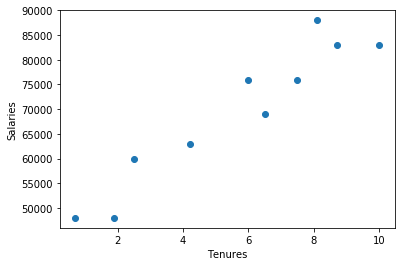

In [32]:
from matplotlib import pyplot as plt

plt.scatter(tenures, salaries)
plt.xlabel("Tenures")
plt.ylabel("Salaries")
plt.show()

산점도에 의하면 경력과 연봉이 서로 비례하는 것으로 보인다.

#### 알아두기
* 산점도
* 맷플롯립(`matplotlib`) 라이브러리를 활용하여 그래프 그리기
    * 3장에서 좀 더 다양한 그래프 그리는 방법을 다룰 예정임.

근속 연수에 따른 평균연봉을 한 번 확인해보자.

In [33]:
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

average_salary_by_tenure = {
    tenure: sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}

In [34]:
average_salary_by_tenure

{8.7: 83000.0,
 8.1: 88000.0,
 0.7: 48000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 2.5: 60000.0,
 10: 83000.0,
 1.9: 48000.0,
 4.2: 63000.0}

그런데 근속 연수가 모두 다르기에 평균연봉을 확인하는 일이 전혀 의미가 없다.
따라서 경력을 아래 구간들로 나누어 확인해보자.

* 2년 미만
* 2년 이상, 5년 미만
* 5년 이상

아래 함수는 경력별 구간지정 함수이다.

In [35]:
def tenure_bucket(tenure):
    if tenure < 2:
        return "less than two"          # 2년 미만
    elif tenure < 5:
        return "between two and five"   # 2년 이상 5년 미만
    else:
        return "more than five"         # 5년 이상

In [36]:
tenure_bucket(0.7)

'less than two'

In [37]:
tenure_bucket(2.5)

'between two and five'

In [38]:
tenure_bucket(7.5)

'more than five'

이제 연봉을 구간별로 구분하고 구간별로 구간에 속한 연봉들을 리스트로 정리한다.
즉, 구간을 키로하고 구간별 연봉들의 리스트를 키값(values)로 같는 사전 자료형을 다음과 같이 구한다.

In [39]:
salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

In [40]:
salary_by_tenure_bucket

defaultdict(list,
            {'more than five': [83000, 88000, 76000, 69000, 76000, 83000],
             'less than two': [48000, 48000],
             'between two and five': [60000, 63000]})

이제 구간별 연봉 평균값을 구해 사전 자료형으로 정리한다.

In [41]:
average_salary_by_bucket = {
  tenure_bucket: sum(salaries) / len(salaries)
  for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

In [42]:
average_salary_by_bucket

{'more than five': 79166.66666666667,
 'less than two': 48000.0,
 'between two and five': 61500.0}

#### 알아두기

* 사전 자료형에 포함된 항목들의 순서는 전혀 의미가 없다.

위 결과로부터 "5년 이상의 경력자가 보다 짧은 경력을 가진 이들보다 65% 이상 더 번다" 라는 정보를 확인할 수 있다.

### 연습문제
경력 구간을 1년 단위로 지정하라.

1. 경력이 1년 증가할 때 연봉이 얼마나 평균적으로 어떻게 변하는가?
1. 경력 10년차 데이터 과학자의 평균연봉이 얼마로 예상되는가?

#### 참조
위 연습문제는 '단순 회귀 분석'과 연관되어 있다. 이후 14장에서 자세히 다룬다.

## 유료 계정

사용자의 유료계정 여부가 서비스 사용기간과 연관되어 보인다. 

```
사용기간   유료계정여부
0.7      paid
1.9      unpaid
2.5      paid
4.2      unpaid
6.0      unpaid
6.5      unpaid
7.5      unpaid
8.1      unpaid
8.7      paid
10.0     paid
```

사용기간이 아주 짧거나 아주 길면 유료계정을,
사용기간이 평균적이면 무료계정을 사용하는 경향을 보인다.

#### 영어 단어

* 페이드(paid): 지불(pay)했다는 의미. 여기서는 유료계정을 의미함.
* 언페이드(unpaid): 지불하지 않다는 의미. 여기서는 무료계정을 의미함.

따라서 유료계정 여부를 모델을 설정할 때 사용기간 정도에 맞추어 다음 함수로 모델링할 수 있다.

In [43]:
def predict_paid_or_unpaid(years_experience):
  if years_experience < 3.0:
    return "paid"
  elif years_experience < 8.5:
    return "unpaid"
  else:
    return "paid"

In [44]:
predict_paid_or_unpaid(2.5)

'paid'

In [45]:
predict_paid_or_unpaid(4.8)

'unpaid'

In [46]:
predict_paid_or_unpaid(11.3)

'paid'

## 관심사 찾기

사용자들의 주요 관심사를 파악하려 한다. 

먼저 사용자별 관심사는 앞서 보았듯이 다음과 같다.

In [47]:
interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

주요관심사를 확인하는 가장 단순한 방법(모델링)은 가장 많이 언급된 관심사를 확인하는 것이다.
이럴 때는 여느때처럼 `Counter` 함수를 사용한다.

In [48]:
words_and_counts = Counter(word
                           for user, interest in interests
                           for word in interest.lower().split())

두 명 이상의 사용자로부터 언급된 관심사는 아래와 같이 확인할 수 있다.

In [49]:
for word, count in words_and_counts.most_common():
    if count > 1:
        print(word, count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2


세 명 이상의 사용자로부터 언급된 관심사는 아래와 같이 확인할 수 있다.

In [50]:
for word, count in words_and_counts.most_common():
    if count > 2:
        print(word, count)

big 3
data 3
java 3
python 3
learning 3


### 연습문제

관심사를 키로 하고 해당 관심사에 관심이 있는 사용자 수를 키값으로 갖는 사전 자료형 값을 리턴하는 함수를 작성하라.

In [51]:
def count_common_interests():
    """리턴값은 아래 모양의 사전 자료형임
        { 관심사: 인원수}"""

### 연습문제

숫자 n을 입력하면 n명 이상으로부터 관심을 갖는 관심사를 사전자료형으로 리턴하는 함수를 작성하라.

In [52]:
def common_interests(n):
    """리턴값은 아래 모양의 사전 자료형임
        { 관심사: 인원수}
        단, 인원수는 n 이상."""